# Group Project Report
#### Anton Buri (58151168), Canberk Kandemir (54411160), Danny Liu (54033675), Jasmine Wu (54422571)
#### DSCI 100 002
#### Due: Tuesday, April 7th, 2020 11:59pm

### Title

“Data & Drink: Predicting the Quality of Red and White Wines”

### Introduction

Winemakers have the ability to modify certain elements of wine they produce to impact consumer perceptions and maximize the appeal of their wines. Certain physiochemicals such as alcohol content, acidity and density can distinguish an excellent wine from a poor one.

The question we are investigating is: Can certain combinations of physiochemicals be used to predict the perceived quality of wine?

The dataset we use to conduct this analysis is from the UCI Machine Learning Repository and it contains data on red and white “Vinho Verde” wine samples from Portugal. There are around 5,000 instances, each characterized by 12 attributes such as residual sugar levels, pH and alcohol content, as well as a quality rating based on a scale of three to nine. Within this dataset, 25 percent of the observations come from red wine samples and 75 percent come from white wine samples.

### Preliminary exploratory analysis

The conduct our analysis, the following libraries and packages are required:
    - Rvest
    - Expss
    - Repr
    - Tidyverse
    - Stringr
    - Forcats
    - DBI
    - RPostgres
    - Lubridate
    - Dplyr
    - Caret
    - GGcorrplot, and
    - GGally
Additionally, to use the *ggcorrplot* and *expss* libraries it is necessary to install the *ggcorrplot* and *expss* packages.

In [1]:
install.packages('ggcorrplot')
install.packages("expss")
library(expss)
library(rvest)
library(repr)
library(tidyverse)
library(stringr)
library(forcats)
library(DBI)
library(RPostgres)
library(lubridate)
library(dplyr)
library(caret)
library(ggcorrplot)
library(GGally)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Use 'expss_output_viewer()' to display tables in the RStudio Viewer.
 To return to the console output, use 'expss_output_default()'.

Loading required package: xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()        masks expss::between()
✖ dplyr::compute()        masks expss::compute()
✖ dplyr::contains()       masks expss::contains()
✖ dplyr::filter()         masks stats::filter()
✖ dplyr::first()          masks expss::first()
✖ stringr::fixed()        masks expss::fixed()
✖ readr::guess_encoding() masks rvest::guess_encoding()
✖ purrr::keep()           

Our dataset can be loaded into R using the *read_csv* command with no additional arguments. The data is read from its original source (Kaggle) via a URL. To do this, we were required to upload the original CSV file, which we downloaded from Kaggle, into Google Drive. We then made the file public within Google Drive and put the share link into the *read_csv* command.

Note: There were no missing values or invalid data in the file so no observations had to be removed.

In [2]:
unscaled_wine <- read_csv("https://drive.google.com/uc?export=download&id=1cJfEyPrqqfBSt31iJawkaRWLC0PBlQ4l")
head(unscaled_wine)

Parsed with column specification:
cols(
  fixed_acidity = col_double(),
  volatile_acidity = col_double(),
  citric_acid = col_double(),
  residual_sugar = col_double(),
  chlorides = col_double(),
  free_sulfur_dioxide = col_double(),
  total_sulfur_dioxide = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double(),
  style = col_character()
)


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,red
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,red
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,red
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,red


Given that our goal was to create a classifier that could predict the quality of wine based on various attributes, we were required to create a classification for each observation based on the value in the 'quality' column. To determine how we would do this, we created a histogram (Figure 1) so that we could observe the distribution of wine qualities in our dataset.  The x-axis on the histogram describes the quality of wine on a scale from 3 to 9, and the y-axis describes the frequency of each quality. 

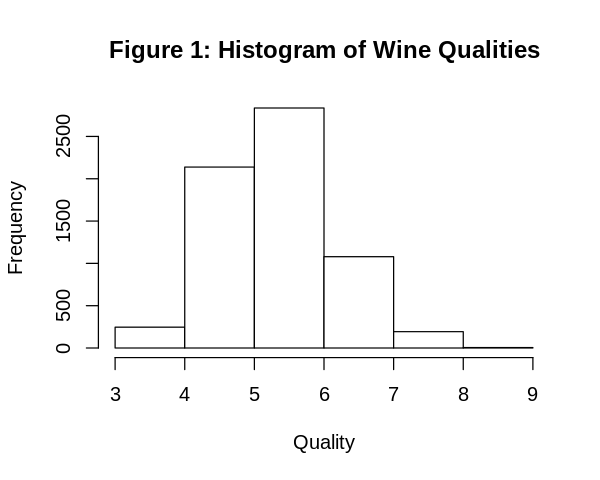

In [3]:
options(repr.plot.width = 5, repr.plot.height = 4) 
hist(unscaled_wine$quality,
     breaks = 7,
     main = "Figure 1: Histogram of Wine Qualities",
     xlab = "Quality",
     col = "white")

Based on Figure 1, we saw that the distribution of qualities wasn't even; there were very few observations that had qualities of 3, 4, 8 and 9. To build an accurate classifier it is necessary to have a fairly even mix of obsevations that fall into each classification so to avoid imbalance between classes. Therefore, we decided to focus our analysis on classifying wines into two categories: "good" and "poor". Doing this would allow us to predict from two categories rather than nine as well as achieve an even distribution across categories.

As observed in Figure 1, there is a more or less equal amount of observations with qualities of 6, 7, 8 or 9 as there are observations where quality is 3, 4 or 5. Therefore, we decided to classify a wine as "good" if it had a quality of 6, 7, 8 or 9 and "poor" if it has a quality of 3, 4 or 5.  Note that no wine has a quality less than 3 or greater than 9. 

To do this, we created a column called 'rating' that assigns each observation a rating based on the previously mentioned criteria. Then, we factorized the values in this vector so that it could be used as a classifier in our model. These steps are shown in the code below.

In [4]:
unscaled_wine <- unscaled_wine %>%
    mutate(rating = ifelse(quality < 6,
                           'poor',
                           'good')) %>%
    mutate(rating = as.factor(rating)) 
head(unscaled_wine)  

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style,rating
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red,poor
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,red,poor
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,red,poor
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,red,good
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red,poor
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,red,poor


The next step in our exploratory analysis was determining if the predictors for quality of wine differed among red and white wines. Given the differences in the production of red and white wines (Sussman, “What's the Difference Between Red and White Wine?”), we realized that these predictors might be different.

To do this, we first split the dataset into two subsets red wine and white wine.

In [5]:
unscaled_red <- unscaled_wine %>%
    filter(style == 'red')
unscaled_white <- unscaled_wine %>%
    filter(style =='white')
head(unscaled_red)
head(unscaled_white)

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style,rating
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red,poor
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,red,poor
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,red,poor
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,red,good
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red,poor
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,red,poor


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style,rating
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6,white,good
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6,white,good
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,white,good
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,white,good
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,white,good
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,white,good


We then used a correlation matrix heatmap that allowed us to observe which attributes of each type of wine were highly correlated with quality. The heat map shows the correlation for different pairs of factors. 

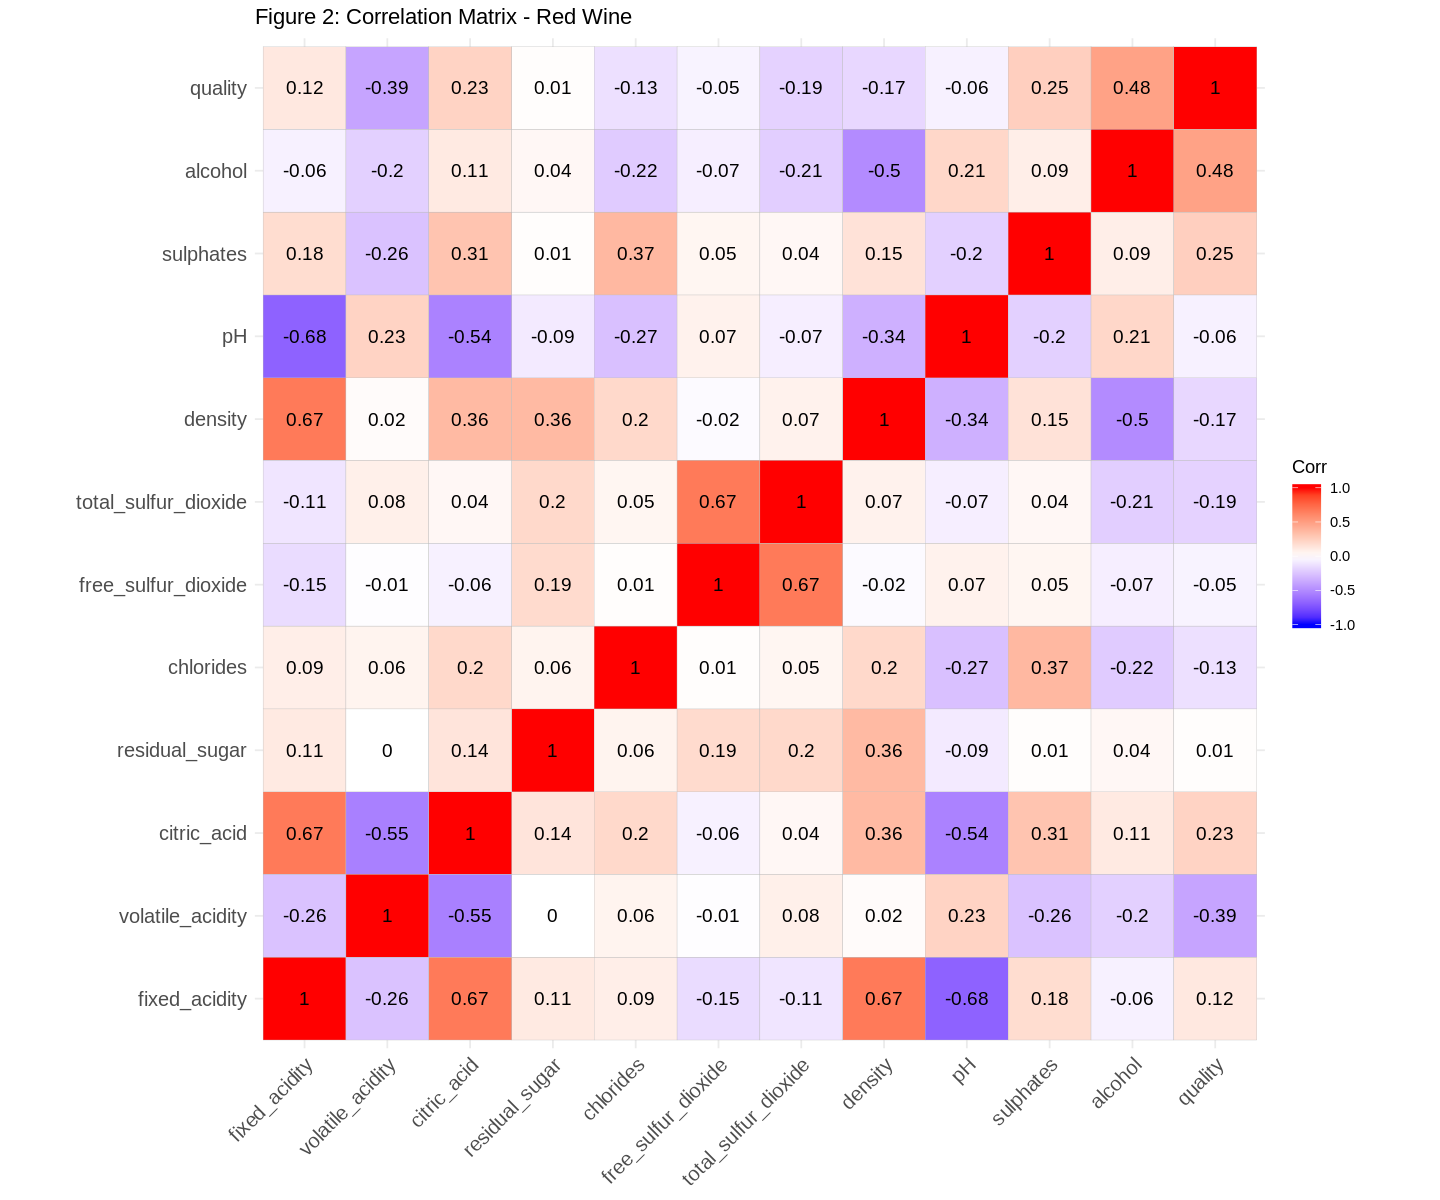

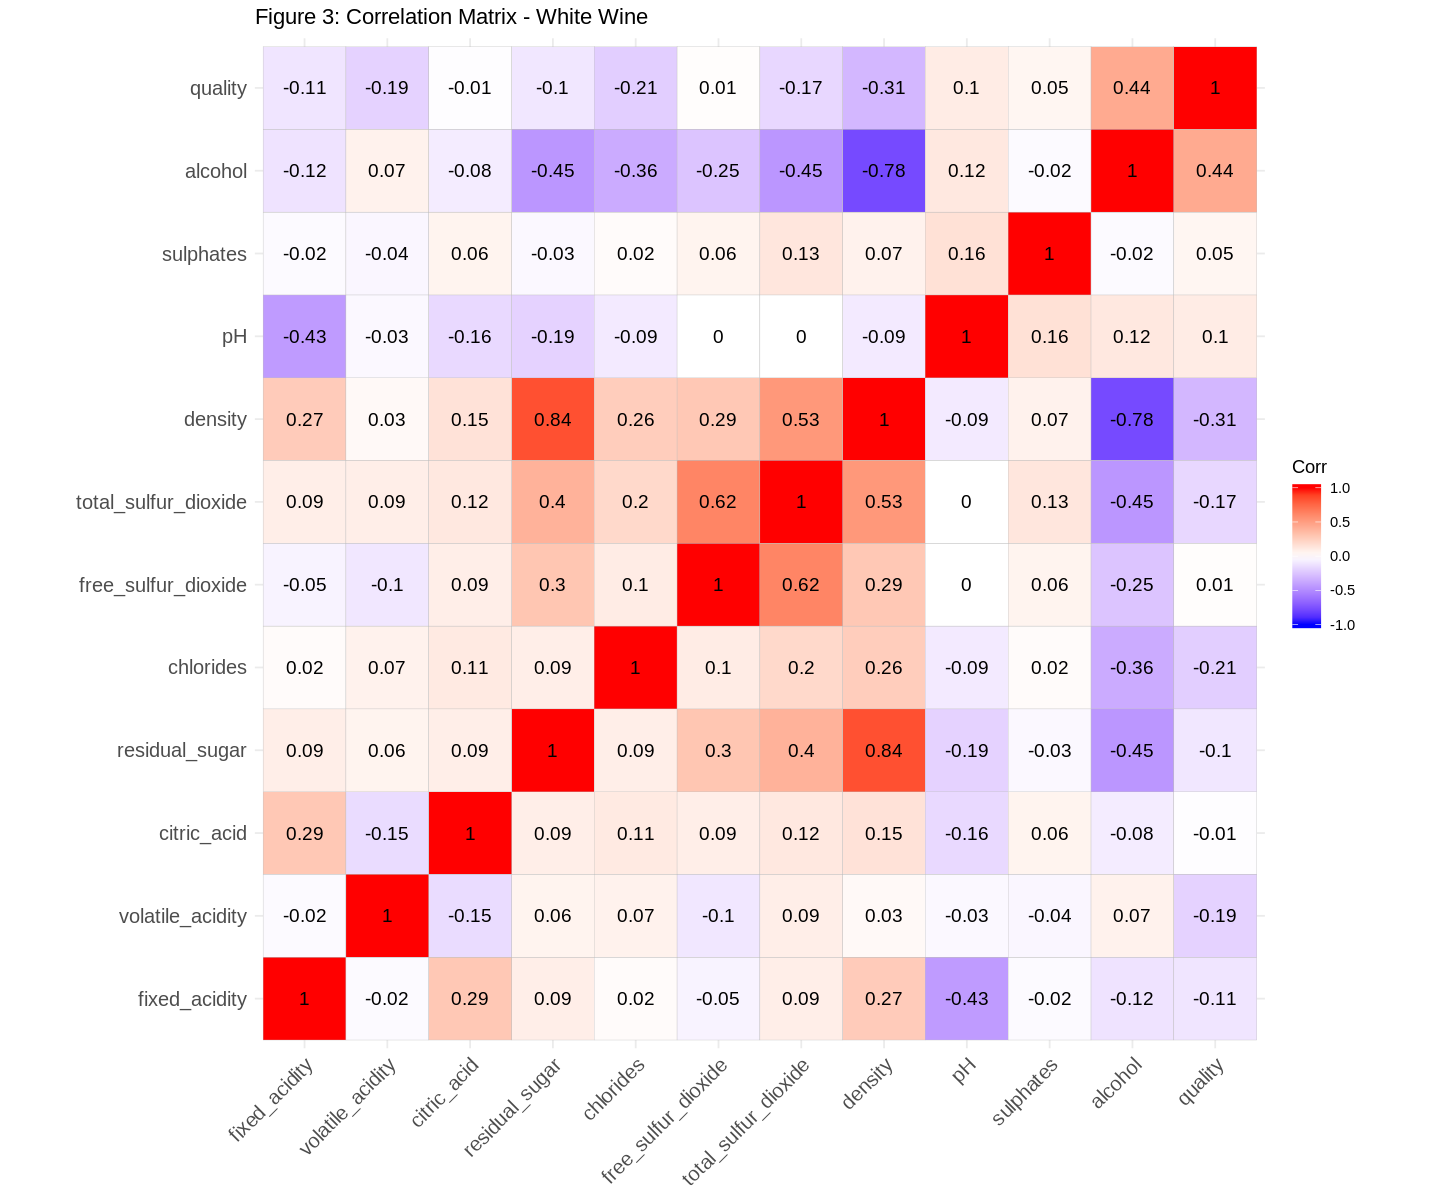

In [6]:
options(repr.plot.width = 12, repr.plot.height = 10)
corr_red <- unscaled_red %>%
    select(-style,-rating) %>%
    cor() 
corr_white <- unscaled_white %>%
    select(-style,-rating) %>%
    cor() 
ggcorrplot(corr_red,lab = TRUE,
           title = "Figure 2: Correlation Matrix - Red Wine")
ggcorrplot(corr_white,lab = TRUE,
           title = "Figure 3: Correlation Matrix - White Wine")

Based on these correlation matrices, we saw that it was indeed the case that red and white wines differed in attributes that predicted their quality. The can be seen by the fact that some variables are strongly correlated with quality for red wines, but are not for white. Specifically, this can be seen by the numbers and the intensity of color of each square; more intense colors indicate stronger correlations.

Furthermore, from these correlation matrices we were able to observe which predictors were most strongly correlated with quality of wine and thus best to include in our analysis. Since our goal is to predict the quality of wine, we would like to find the most influential factors to use as predictors for quality. Furthermore, due to the fact that K-nearest neighbours classification tends to perform poorly with a large number of predictors, we saw it as important to select only predictors that had a strong correlation to wine quality (Timbers, Campbell and Lee, "Introduction to Data Science"). Specifically, we chose only to includ variables that had an absolute correlation value with quality that was greater than 0.2.

Therefore, we proceeded with our analysis using only the following predictor variables:

Red wine: volatile acidity, citric acid, sulphates, alcohol

White wine: chlorides, density, alcohol

Finally, before conducting our analysis we wanted to confirm that there was no class imbalance within each of our data subsets.

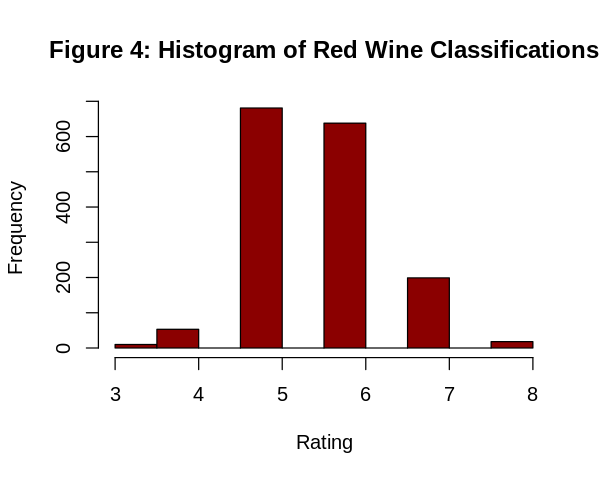

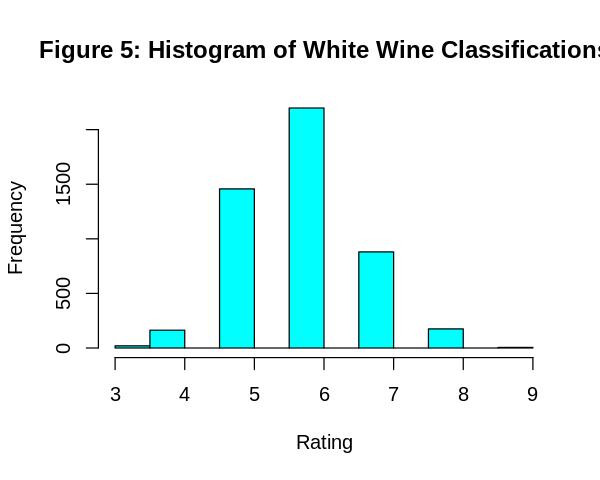

In [7]:
options(repr.plot.width = 5, repr.plot.height = 4) 
hist(unscaled_red$quality,
     main = "Figure 4: Histogram of Red Wine Classifications",
     xlab = "Rating",
     col = "darkred")
hist(unscaled_white$quality,
     main = "Figure 5: Histogram of White Wine Classifications",
     xlab = "Rating",
     col = "cyan")

Based on Figures 4 and 5 we confirmed that there was no class imbalance within the red and white wine datasets. Therefore, we proceeded with our analysis using the following dataframes. A summary of these dataframes is shown below in Tables 1 and 2 below.

In [8]:
#Red
unscaled_red <- select(unscaled_red, volatile_acidity, citric_acid, sulphates, alcohol, rating)
head(unscaled_red)
#White
unscaled_white <- select(unscaled_white, chlorides, density, alcohol, rating)
head(unscaled_white)

unscaled_red %>% 
    tab_cells(volatile_acidity, citric_acid, sulphates, alcohol) %>%
    tab_cols(total(label = "Total| |"), rating) %>% 
    tab_stat_fun(Mean = w_mean, "# of Observations" = w_n, method = list) %>%
    tab_pivot() %>%
    set_caption("Table 1: Summary statistics (Red wine)")
unscaled_white %>% 
    tab_cells(alcohol, density, chlorides) %>%
    tab_cols(total(label = "Total| |"), rating) %>% 
    tab_stat_fun(Mean = w_mean, "# of Observations" = w_n, method = list) %>%
    tab_pivot() %>%
    set_caption("Table 2: Summary statistics (White wine)")

volatile_acidity,citric_acid,sulphates,alcohol,rating
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.70,0.00,0.56,9.4,poor
0.88,0.00,0.68,9.8,poor
0.76,0.04,0.65,9.8,poor
0.28,0.56,0.58,9.8,good
0.70,0.00,0.56,9.4,poor
0.66,0.00,0.56,9.4,poor


chlorides,density,alcohol,rating
<dbl>,<dbl>,<dbl>,<fct>
0.045,1.0010,8.8,good
0.049,0.9940,9.5,good
0.050,0.9951,10.1,good
0.058,0.9956,9.9,good
0.058,0.9956,9.9,good
0.050,0.9951,10.1,good


Table 1: Summary statistics (Red wine)                                                                                                         
 |                  | Total |                   | rating |                   |      |                   |
 |                  |       |                   |   good |                   | poor |                   |
 |                  |  Mean | # of Observations |   Mean | # of Observations | Mean | # of Observations |
 | ---------------- | ----- | ----------------- | ------ | ----------------- | ---- | ----------------- |
 | volatile_acidity |   0.5 |              1599 |    0.5 |               855 |  0.6 |               744 |
 |      citric_acid |   0.3 |              1599 |    0.3 |               855 |  0.2 |               744 |
 |        sulphates |   0.7 |              1599 |    0.7 |               855 |  0.6 |               744 |
 |          alcohol |  10.4 |              1599 |   10.9 |               855 |  9.9 |               744 |

Table 2: Summary statistics (White wine)                                                                                                  
 |           | Total |                   | rating |                   |      |                   |
 |           |       |                   |   good |                   | poor |                   |
 |           |  Mean | # of Observations |   Mean | # of Observations | Mean | # of Observations |
 | --------- | ----- | ----------------- | ------ | ----------------- | ---- | ----------------- |
 |   alcohol |  10.5 |              4898 |   10.8 |              3258 |  9.8 |              1640 |
 |   density |   1.0 |              4898 |    1.0 |              3258 |  1.0 |              1640 |
 | chlorides |   0.0 |              4898 |    0.0 |              3258 |  0.1 |              1640 |

### Methods and Results

Our analysis uses K-nearest neighbours to train a classifier that can predict the quality of wine as either "good" or "bad". We began our anaysis by splitting the data so that 75% of it was used in the training set and 25% was used in the test set. Our rationale for dividing the data up in this was was to use more observations to build and train our classifier, thus making it more accurate. Although the dataset is quite large, we decided that a 75-25 split would be best since we have little background knowledge about wine physiochemical characteristics and their relation with wine quality.

In [9]:
set.seed(1234)
#Red
set_rows_red <- unscaled_red %>%
    select(rating) %>%
    unlist() %>%
    createDataPartition(p = 0.75, list = FALSE)
training_set_red <- unscaled_red %>%
    slice(set_rows_red)
test_set_red <- unscaled_red %>%
    slice(-set_rows_red)
#White
set_rows_white <- unscaled_white %>%
    select(rating) %>%
    unlist() %>%
    createDataPartition(p = 0.75, list = FALSE)
training_set_white <- unscaled_white %>%
    slice(set_rows_white)
test_set_white <- unscaled_white %>%
    slice(-set_rows_white)

Below is a preview of our training sets...

In [10]:
glimpse(training_set_red)
glimpse(training_set_white)

Observations: 1,200
Variables: 5
$ volatile_acidity <dbl> 0.760, 0.280, 0.700, 0.600, 0.650, 0.580, 0.580, 0.5…
$ citric_acid      <dbl> 0.04, 0.56, 0.00, 0.06, 0.00, 0.02, 0.08, 0.36, 0.56…
$ sulphates        <dbl> 0.65, 0.58, 0.56, 0.46, 0.47, 0.57, 0.54, 0.80, 0.75…
$ alcohol          <dbl> 9.8, 9.8, 9.4, 9.4, 10.0, 9.5, 9.2, 10.5, 10.5, 9.3,…
$ rating           <fct> poor, good, poor, poor, good, good, poor, poor, good…
Observations: 3,674
Variables: 4
$ chlorides <dbl> 0.045, 0.049, 0.050, 0.058, 0.058, 0.045, 0.045, 0.049, 0.0…
$ density   <dbl> 1.0010, 0.9940, 0.9951, 0.9956, 0.9956, 0.9949, 1.0010, 0.9…
$ alcohol   <dbl> 8.8, 9.5, 10.1, 9.9, 9.9, 9.6, 8.8, 9.5, 11.0, 12.0, 9.7, 1…
$ rating    <fct> good, good, good, good, good, good, good, good, good, poor,…


... and of our test sets.

In [11]:
glimpse(test_set_red)
glimpse(test_set_white)

Observations: 399
Variables: 5
$ volatile_acidity <dbl> 0.700, 0.880, 0.660, 0.500, 0.615, 0.610, 0.620, 0.6…
$ citric_acid      <dbl> 0.00, 0.00, 0.00, 0.36, 0.00, 0.29, 0.18, 0.19, 0.08…
$ sulphates        <dbl> 0.56, 0.68, 0.56, 0.80, 0.52, 1.56, 0.88, 0.93, 0.50…
$ alcohol          <dbl> 9.4, 9.8, 9.4, 10.5, 9.9, 9.1, 9.2, 9.2, 9.0, 9.2, 9…
$ rating           <fct> poor, poor, poor, poor, poor, poor, poor, poor, poor…
Observations: 1,224
Variables: 4
$ chlorides <dbl> 0.050, 0.040, 0.032, 0.049, 0.074, 0.046, 0.047, 0.044, 0.0…
$ density   <dbl> 0.9951, 0.9920, 0.9914, 0.9930, 0.9937, 0.9955, 0.9914, 0.9…
$ alcohol   <dbl> 10.1, 10.8, 11.4, 10.5, 9.3, 10.4, 11.6, 10.2, 11.2, 9.4, 9…
$ rating    <fct> good, poor, good, good, poor, good, good, poor, good, good,…


Since k-nn is sensitive to the scale of the predictors, we performed a data transformation to scale and center the data. We took into account that we should only use the training data when creating *scale_transformer*. We did not want the test data to influence any aspect of our model training. We applied the scaling transformer to both our white and red wine data.

In [12]:
#Red
scale_transformer <- preProcess(training_set_red, method = c("center", "scale")) 
training_set_red<- predict(scale_transformer, training_set_red)
test_set_red<- predict(scale_transformer, test_set_red)
#White
scale_transformer <- preProcess(training_set_white, method = c("center", "scale")) 
training_set_white<- predict(scale_transformer, training_set_white)
test_set_white<- predict(scale_transformer, test_set_white)

After splitting our data up into a training set and a test set and then scaling it, we next used cross-validation to split up our overall training set in different ways, train and evaluate the classifier for each split, then choose our k-value based on these results. Cross-validation was important because if we just split our overall training set once, our chosen k-value would only depend on whichever data ended up in the validation set.

We chose to conduct 5-fold cross-validation. While keeping in mind that more folds generally results in a more accurate classifier, we decided that sacrificing some accuracy for computational speed was appropriate given that the consequences of our analysis are not significant (Timbers, Campbell and Lee, "Introduction to Data Science").

In [13]:
X_train_red <- training_set_red %>% 
  select(-rating) %>% 
  data.frame()
Y_train_red <- training_set_red %>% 
  select(rating) %>% 
  unlist()
X_train_white <- training_set_white %>% 
  select(-rating) %>% 
  data.frame()
Y_train_white <- training_set_white %>% 
  select(rating) %>% 
  unlist()

train_control <- trainControl(method = 'cv',number = 5)

Next, we create a classifier, adding the *train_control* object to the *trControl* argument to conduct cross-validation. We defined a vector of numbers from 10 to 250 (increments of 5) and ran it using our training data to determine the best k-value to use for our final classifier. 

In [14]:
set.seed(1234)
ks <- data.frame(k = seq(from = 10, to = 250, by = 5))
choose_k_red <- train(x = X_train_red,
                      y = Y_train_red,
                      method = "knn",
                      tuneGrid = ks,
                      trControl = train_control)
choose_k_white <- train(x = X_train_white,
                        y = Y_train_white,
                        method = "knn",
                        tuneGrid = ks,
                        trControl = train_control)

To visualize how accuracy changed with k, we created line and point plots that compared k-values and their accuracies. These are shown below in Figures 6 and 7.

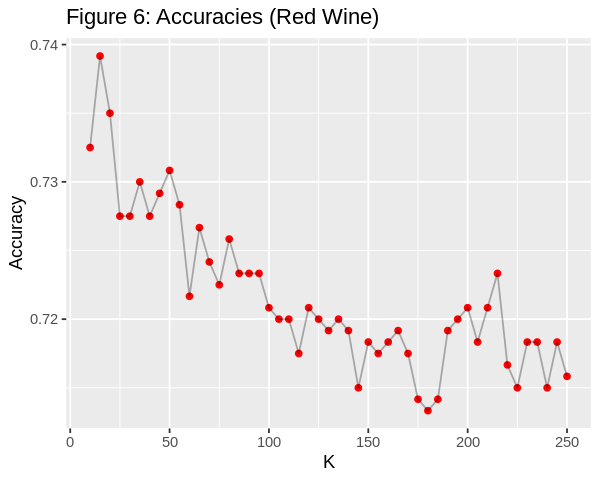

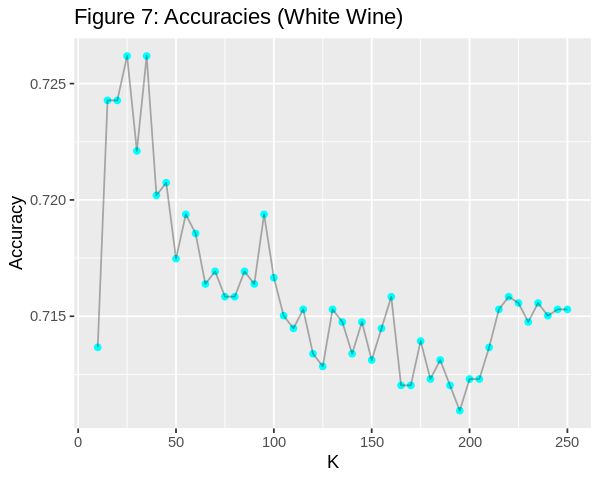

In [15]:
k_accuracies_red <- choose_k_red$results %>%
                    select(k, Accuracy)
k_accuracies_white <- choose_k_white$results %>%
                    select(k, Accuracy)
choose_k_plot_red <- ggplot(k_accuracies_red, aes(x = k, y = Accuracy)) +
                        geom_point(color = 'red') +
                        geom_line(alpha = 0.3) +
                        xlab("K") +
                        ggtitle("Figure 6: Accuracies (Red Wine)")
choose_k_plot_white <- ggplot(k_accuracies_white, aes(x = k, y = Accuracy)) +
                            geom_point(color = 'cyan') +
                            geom_line(alpha = 0.3) +
                            xlab("K") +
                            ggtitle("Figure 7: Accuracies (White Wine)")
choose_k_plot_red
choose_k_plot_white

Our goal was to choose a k-value that yielded roughly the highest possible accuracy, while being reliable in the presence of uncertainty (i.e. changing the k-value slightly won't greatly reduce accuracy) (Timbers, Campbell and Lee, "Introduction to Data Science"). To do this, we used the following code to find the k-value which yielded the highest possible accuracy, and used the line charts in Figures 6 and 7 to confirm these selections.

In [16]:
best_k_red <- choose_k_red$results %>%
    filter(Accuracy == max(Accuracy)) %>%
    select(k) %>%
    unlist()
best_k_red

k 
15

In [17]:
best_k_white <- choose_k_white$results %>%
    filter(Accuracy == max(Accuracy)) %>%
    select(k) %>%
    unlist()
best_k_white

k 
35

We found that for the red wine data set the optimal k-value was **15**, while for the white wine datset the optimal value was **35**.

Next, we used these k-values to train our final models (classifiers) for red and white wines.

In [18]:
#Red
model_red <- train(x = X_train_red, 
                   y = Y_train_red,
                   method = 'knn', 
                   tuneGrid = data.frame(k = best_k_red),
                   trControl = train_control)
#White
model_white <-train(x = X_train_white,
                    y = Y_train_white,
                    method = 'knn',
                    tuneGrid = data.frame(k = best_k_white),
                    trControl = train_control)
model_white
model_red

k-Nearest Neighbors 

3674 samples
   3 predictor
   2 classes: 'good', 'poor' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 2939, 2940, 2939, 2939, 2939 
Resampling results:

  Accuracy   Kappa    
  0.7207396  0.3191435

Tuning parameter 'k' was held constant at a value of 35

k-Nearest Neighbors 

1200 samples
   4 predictor
   2 classes: 'good', 'poor' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 960, 960, 959, 961, 960 
Resampling results:

  Accuracy   Kappa    
  0.7383767  0.4742758

Tuning parameter 'k' was held constant at a value of 15

Finally, to determine our final models' effectiveness, we used it to predict the ratings of the observations in our test set, then compare those predictions from the actual ratings to evaluate the models' accuracy.

In [19]:
#Red
X_test_red <- test_set_red %>%
    select(-rating) %>%
    data.frame()
Y_test_red <- test_set_red %>% 
  select(rating) %>% 
  unlist()
Y_test_predicted_red <- predict(object = model_red, X_test_red)
#White
X_test_white <- test_set_white %>%
    select(-rating) %>%
    data.frame()
Y_test_white <- test_set_white %>% 
  select(rating) %>% 
  unlist()
Y_test_predicted_white <- predict(object = model_white, X_test_white)

model_quality_red <- confusionMatrix(data = Y_test_predicted_red, reference = Y_test_red)
model_quality_white<- confusionMatrix(data = Y_test_predicted_white, reference = Y_test_white)

model_quality_red
model_quality_white

Confusion Matrix and Statistics

          Reference
Prediction good poor
      good  149   41
      poor   64  145
                                          
               Accuracy : 0.7368          
                 95% CI : (0.6907, 0.7794)
    No Information Rate : 0.5338          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.4754          
                                          
 Mcnemar's Test P-Value : 0.03179         
                                          
            Sensitivity : 0.6995          
            Specificity : 0.7796          
         Pos Pred Value : 0.7842          
         Neg Pred Value : 0.6938          
             Prevalence : 0.5338          
         Detection Rate : 0.3734          
   Detection Prevalence : 0.4762          
      Balanced Accuracy : 0.7396          
                                          
       'Positive' Class : good            
                        

Confusion Matrix and Statistics

          Reference
Prediction good poor
      good  691  223
      poor  123  187
                                          
               Accuracy : 0.7173          
                 95% CI : (0.6912, 0.7424)
    No Information Rate : 0.665           
    P-Value [Acc > NIR] : 4.869e-05       
                                          
                  Kappa : 0.3246          
                                          
 Mcnemar's Test P-Value : 1.025e-07       
                                          
            Sensitivity : 0.8489          
            Specificity : 0.4561          
         Pos Pred Value : 0.7560          
         Neg Pred Value : 0.6032          
             Prevalence : 0.6650          
         Detection Rate : 0.5645          
   Detection Prevalence : 0.7467          
      Balanced Accuracy : 0.6525          
                                          
       'Positive' Class : good            
                        

### Discussion

Our model classifies the quality of red wines slightly better than it does for whites. It shows an **accuracy** of **73.68% for red wines** and **71.73% for whites**. Red wine may have performed because there is slightly less class imbalance in that dataset. This can be seen in the 'Reference' section in each of the confusion matrices above. However, both classifiers were fairly equal in the abiility to correctly predict quality of wine.

The final models used the most common value for quality, 6, to divide the dataset into the categories of ‘low’ (quality < 6) and ‘high’ (quality > 6). We did this because, as stated previously, there are a lot more normal wines (quality = 5 or 6) than excellent or poor ones. Without taking this step, the overabundance of 6s causes the accuracy of our model to decrease by about 20%, a very significant margin. The red wine dataset was relatively balanced (prevalence = 53.38%) and the model’s specificity was only slightly better than its sensitivity (74.73% vs 67.61%). The white wine dataset had about twice as many ‘high’ values as low values and the white wine model had a really high sensitivity value (86.12%) compared with its specificity value (54.39%), meaning it was significantly better at predicting when a wine is high quality than when it is low quality. If the white wine dataset was perfectly balanced, the model’s accuracy would be the average of the sensitivity and specificity values, which is 70.26%, an accuracy value similar to that of the red wine model.

The results of our analysis are more or less what we expected to find. Initially, we hypothesized that certain characteristics *could* predict the quality of wine given the fact that they determine the taste, smell and consistency of the wine. We were surprised, however, to find that the best predictors for quality of wine was different for reds and whites. Furthermore, we were surprise to discover that sugar was not a strong predictor of quality of wine since intuitively sugar has lots do do with taste. We also found that different types of acidity affect red and white wines differently. For example, fixed acidity impacts quality of red wine more while volatile acidity impacts quality of white wine more.

Some of the limitations we experienced include a slower model for the white wine data set. This was because K-nearest neighbour classifaction becomes slower as data gets larger. Since the original data set was fairly large, running the analyses took some time. In addition, we did not have all predictor variables available to us through the data set than may have impacted wine quality. Perhaps other factors such as location, brand, color, etc. may have impacted quality as well which is not accounted for in the classification model.

The results of our analysis have the potential to be used by winemakers to adjust the ingredients, recipes and brewing processes they use to achieve high quality wines. Doing so will have a positive impact on profit margins and brand reputation. Furthermore, the attributes we find that are useful for predicting quality of wine can perhaps be used to anticipate the quality of other alcoholic or wine-related beverages.

Additional questions that may arise from this analysis include ones about the relationship between consumer preferences and health effects of wine. For example, given the attributes that are desirable in a wine, why might wine-drinkers experience certain health consequences or benefits? The findings may also lead to questions about why certain physiochemicals such as sugar do not have an impact on wine quality ratings. There are also questions regarding why some physiochemicals impact red wine more than white wine and vice versa. In addition, future research may want to conduct a similar analysis but with more classes, for example "poor", "mediocre" and "good". It is possible that using more classes paints a better picture of which attributes are best used to predict the quality of red and white wines.

### References

Cortez, Paulo, Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis. "Modeling wine preferences by data mining from physicochemical properties" *Decision Support Systems*, Volume 47 (4): 547-553, 2009.

Horák, M. "Prediction of wine quality from physicochemical properties" 2010 www.buben.piranhacz.cz/wp-content/uploads/PredictionWineQuality_mhorak_VD.pdf. Accessed 7 Apr. 2020

*Kaggle*. Kaggle Inc., 2019, www.kaggle.com/. Accessed 7 Apr. 2020.

Sussman, Zachary. “What's the Difference Between Red and White Wine?” *Food & Wine*, 23 May 2017 www.foodandwine.com/wine/whats-difference-between-red-and-white-wine. Accessed 7 Apr. 2020.

Timbers, Tiffany-Anne, Trevor Campbell, and Melissa Lee. "Introduction to Data Science" 9 Mar. 2020, https://ubc-dsci.github.io/introduction-to-datascience/ Accessed 7 Apr. 2020.